In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import sklearn

from sklearn.preprocessing import scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import metrics

mpl.rcParams['font.family'] = "serif"
mpl.rcParams['text.usetex'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.direction'] = "in"
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.direction'] = "in"
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 20
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['figure.figsize'] = (6,4)
plt.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]    

def y_by_x(self, y, x, width=1):
    ''' Group dataframe values y by values x binned by width. Default binning of x is 1.
    x and y can be column names or transformations interpretable by the eval method.  
    '''
    grps = self.eval(x).apply(lambda t: int(t/float(width))*float(width) if not pd.isna(t) else t) 
    values = self.eval(y)
    return values.groupby(grps)

pd.DataFrame.y_by_x = y_by_x

def plot_pd_series(series, **kwargs):
    plt.plot(series.index, series.values, **kwargs, marker='o')
    
def find_nearest_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [2]:
injs = pd.read_csv('inj_data_final.csv')
injs.drop(columns=['Unnamed: 0','Opp','Team'],inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (104,113,122) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
enc = OneHotEncoder(sparse=False)
vals = enc.fit_transform(injs[['Position','Pos3','Shoots']])
cols = []
for cat in enc.categories_:
    cols = np.concatenate((cols,cat))
oneHot_cols = pd.DataFrame(vals,columns=cols)
injs = pd.concat((injs,oneHot_cols),axis=1)
injs.fillna(value=0,inplace=True) #Fill NaNs with 0
injs = injs.loc[injs['Name']!=0]

In [4]:
col_dict = {}
col_dict['Was_Injured?'] = 'Was_Injured'

for c in injs.columns:
    strng = c.replace(' ','_')
    strng = strng.replace('.','')
    strng = strng.replace('%','_per')
    if strng != c:
        col_dict[c] = strng

injs.rename(columns=col_dict,inplace=True)    

In [5]:
injs.drop(columns=['Position','Pos3','Shoots'],inplace=True)

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
y = injs['Was_Injured']
X = injs.drop(columns=['Was_Injured','Dist_Feet_Av_7','Dist_Feet_Av_14','Dist_Feet_Av_21','Date','Name'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [9]:
predicted = clf.predict(X_test)

In [10]:
print(metrics.accuracy_score(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

cm = metrics.confusion_matrix(y_test,predicted)
print(cm)

print(metrics.f1_score(y_test, predicted))

0.9366057472646387
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97     32321
         1.0       0.04      0.05      0.05       947

    accuracy                           0.94     33268
   macro avg       0.51      0.51      0.51     33268
weighted avg       0.95      0.94      0.94     33268

[[31107  1214]
 [  895    52]]
0.04699502937189336


In [11]:
coeffs = pd.DataFrame(zip(X.columns, np.transpose(clf.feature_importances_)))
sort_df = coeffs.loc[coeffs[1].abs().argsort()[::-1]].reset_index()

In [12]:
sort_df

,index,0,1
0,2,Age,0.029633
1,23,+/-_Av7,0.017776
2,64,PF_Av21,0.017323
3,45,+/-_Av14,0.015908
4,67,+/-_Av21,0.015787
5,116,Avg_Speed_Def_Av_21,0.014936
6,100,Avg_Speed_Def_Av_7,0.014836
7,56,FT_per_Av21,0.013832
8,22,GmSc_Av7,0.013795
9,98,Avg_Speed_Av_7,0.013668


### How do we use with just the $N$ best performing features?

In [13]:
N_features = [10,20,30,40,50]
folds = 5
f1_scores = np.zeros((len(N_features),folds))

for i,N in enumerate(N_features):

    X_slice = X[sort_df[0][:N]]
    
    print(N)
    
    model= DecisionTreeClassifier()
    scores = model_selection.cross_validate(model, X_slice, y, cv=folds,scoring='f1')                   
    f1_scores[i] = scores['test_score']

10
20
30
40
50


Text(0, 0.5, '$F_1$ score')

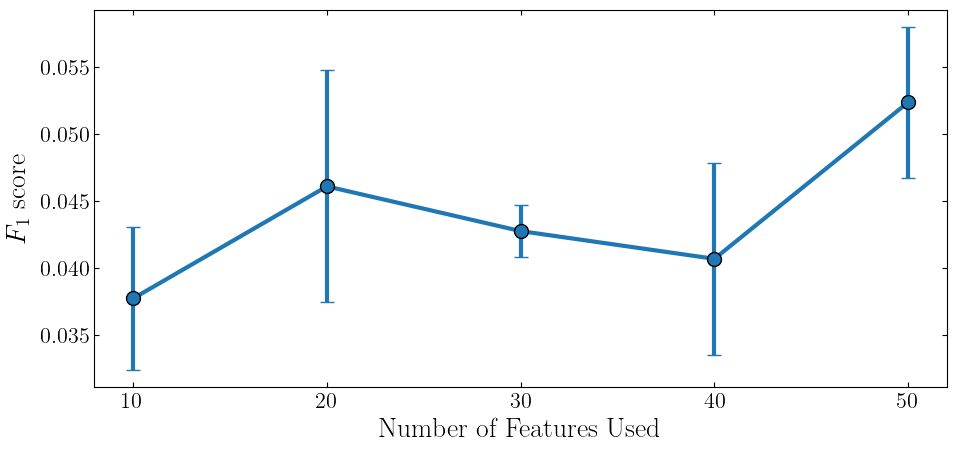

In [14]:
fig = plt.figure(figsize=(11,5))

means = np.mean(f1_scores,axis=1)
stds = np.std(f1_scores,axis=1)
x = np.arange(0,len(N_features))
plt.errorbar(x,means,yerr=stds,marker='o',capsize=5,lw=3,mec='k',ms=10)
x_tick_locs = np.arange(0,len(N_features))

plt.xticks(x_tick_locs,["%d" %N for N in N_features])    

plt.xlabel("Number of Features Used")
plt.ylabel(r'$F_1$ score')

In [17]:
clf.tree_.max_depth

74

### Now we grid search

In [15]:
games_added = 5.889 - 1 #Avg missed games from missed_games notebook - 1 because the player is rested in that game

def net_games(estimator, X, y_true):
    predicted = estimator.predict(X)
    cm = metrics.confusion_matrix(y_true,predicted)
    return games_added*cm[1,1]-cm[0,1]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X[sort_df[0][:50]], y, test_size=0.25)

In [25]:
params = [{'class_weight' : [{0:1,1:1},{0:1,1:3},{0:1,1:5},{0:1,1:10},{0:1,1:15},{0:1,1:20}\
                    ,],'max_depth' : [None,100,50,30,20,15,10,5], 'min_samples_split' : [2,5,10,20,30,50,75]}]
       
model=DecisionTreeClassifier()

clf = model_selection.GridSearchCV(model,params,scoring=net_games,verbose=3,n_jobs=6)

clf.fit(X_train,y_train)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:   31.8s
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:  5.8min
[Parallel(n_jobs=6)]: Done 500 tasks      | elapsed: 10.7min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 15.2min
[Parallel(n_jobs=6)]: Done 1140 tasks      | elapsed: 20.2min
[Parallel(n_jobs=6)]: Done 1556 tasks      | elapsed: 26.7min
[Parallel(n_jobs=6)]: Done 1680 out of 1680 | elapsed: 28.2min finished


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=6,
             param_grid=[{'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 3},
                                           {0: 1, 1: 5}, {0: 1, 1: 10},
                                           {0: 1, 1: 15}, {0: 1, 1: 20}],
                          'max_depth': [None, 100, 50, 30, 20, 15, 10, 5],
                          'min_samples_split': [2, 5, 10, 20, 30, 50, 75]}],
             scoring=<function net_games at 0x13397b9d8>, verbose=3)

In [58]:
X_train

,Age,+/-_Av21,+/-_Av7,FG_per_Av21,Avg_Speed_Off_Av_7,+/-_Av14,GmSc_Av7,Avg_Speed_Def_Av_7,Avg_Speed_Off_Av_21,STL_Av21,...,MP_Av14,PF_Av7,FGA_Av21,L_Av_21,PF_Av14,N_prev_injs,ORB_Av21,FTA_Av7,Dist_Miles_Off_Av_7,Dist_Miles_Off_Av_14
122849,22.186174,-0.888889,-1.000000,0.416667,4.47,0.833333,5.100000,3.99,4.42,0.555556,...,18.177778,1.000000,5.333333,2,1.166667,0.0,0.111111,0.250000,0.77,0.63
45083,21.235455,4.250000,5.000000,0.333333,4.53,2.333333,6.700000,3.99,4.62,0.250000,...,11.150000,1.000000,3.000000,3,0.666667,1.0,1.000000,4.000000,0.60,0.45
105654,24.936345,-11.250000,-6.666667,0.216216,4.82,-6.666667,1.566667,4.04,4.74,1.500000,...,22.122222,3.666667,9.250000,4,3.666667,6.0,0.500000,3.666667,0.91,0.91
62310,25.766598,1.555556,-3.000000,0.475862,4.07,1.000000,25.650000,3.59,4.02,1.111111,...,32.833333,2.500000,16.111111,3,3.000000,21.0,2.333333,5.500000,1.19,1.21
76308,20.355921,-2.000000,-7.250000,0.503876,4.47,-3.857143,10.675000,3.81,4.37,0.454545,...,27.247619,2.750000,11.727273,7,3.142857,0.0,1.636364,1.500000,0.96,1.05
7597,29.199863,4.666667,2.000000,0.402597,4.46,7.400000,4.833333,4.04,4.35,1.222222,...,24.370000,2.666667,8.555556,5,2.200000,6.0,0.444444,0.000000,0.81,0.88
108476,31.219028,3.444444,2.250000,0.471910,4.63,1.428571,9.075000,4.28,4.57,1.111111,...,23.207143,2.000000,9.888889,4,1.857143,22.0,1.333333,2.750000,0.94,0.94
131566,33.616016,-2.000000,-12.000000,0.433962,4.47,-6.500000,-5.800000,3.69,4.64,0.333333,...,26.562500,4.000000,8.833333,4,3.500000,7.0,0.666667,0.000000,0.74,0.97
15149,27.785763,-5.700000,-9.250000,0.468571,4.18,-5.000000,13.850000,3.84,4.18,0.900000,...,35.883333,2.250000,17.500000,8,2.857143,8.0,3.400000,4.500000,1.15,1.24
22879,26.090349,-1.166667,1.666667,0.444444,5.63,-0.750000,6.000000,4.03,5.65,0.833333,...,17.350000,1.000000,4.500000,4,1.250000,0.0,0.000000,1.333333,1.01,0.78


In [26]:
print(clf.best_score_,clf.best_params_)

-3.2 {'class_weight': {0: 1, 1: 1}, 'max_depth': 5, 'min_samples_split': 75}


In [21]:
clf.predict()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.679053,0.237135,0.032272,0.002768,"{0: 1, 1: 1}",None,2,"{'class_weight': {0: 1, 1: 1}, 'max_depth': No...",-599.774,-599.663,-548.774,-624.219,-616.774,-597.8408,26.339643,47
1,6.976683,0.294536,0.032378,0.001650,"{0: 1, 1: 1}",None,5,"{'class_weight': {0: 1, 1: 1}, 'max_depth': No...",-501.774,-449.440,-489.664,-521.553,-485.330,-489.5522,23.665383,18
2,7.337164,0.434098,0.033899,0.002434,"{0: 1, 1: 1}",None,20,"{'class_weight': {0: 1, 1: 1}, 'max_depth': No...",-288.665,-220.998,-254.443,-261.776,-253.109,-255.7982,21.615193,7
3,7.598767,0.223090,0.033697,0.000462,"{0: 1, 1: 1}",50,2,"{'class_weight': {0: 1, 1: 1}, 'max_depth': 50...",-617.219,-596.663,-564.664,-606.997,-558.107,-588.7300,23.346003,44
4,7.632414,0.239545,0.033144,0.000357,"{0: 1, 1: 1}",50,5,"{'class_weight': {0: 1, 1: 1}, 'max_depth': 50...",-504.441,-465.663,-505.331,-499.664,-507.886,-496.5970,15.694403,19
5,7.654616,0.225190,0.034189,0.001524,"{0: 1, 1: 1}",50,20,"{'class_weight': {0: 1, 1: 1}, 'max_depth': 50...",-282.665,-224.220,-240.443,-278.332,-256.331,-256.3982,22.185788,8
6,6.894975,0.086962,0.033123,0.000777,"{0: 1, 1: 1}",30,2,"{'class_weight': {0: 1, 1: 1}, 'max_depth': 30...",-368.886,-399.108,-362.109,-400.331,-310.108,-368.1084,32.863095,13
7,6.860608,0.086128,0.033518,0.001410,"{0: 1, 1: 1}",30,5,"{'class_weight': {0: 1, 1: 1}, 'max_depth': 30...",-327.664,-361.108,-279.220,-332.220,-279.886,-316.0196,31.908796,11
8,6.845805,0.106076,0.035200,0.001561,"{0: 1, 1: 1}",30,20,"{'class_weight': {0: 1, 1: 1}, 'max_depth': 30...",-223.332,-186.665,-169.999,-179.554,-140.998,-180.1096,26.621042,4
9,3.770797,0.043603,0.030883,0.001180,"{0: 1, 1: 1}",15,2,"{'class_weight': {0: 1, 1: 1}, 'max_depth': 15...",-74.777,-64.221,-58.222,-75.110,-45.443,-63.5546,11.102975,3


In [24]:
print(clf.best_params_,clf.best_score_)

{'class_weight': {0: 1, 1: 1}, 'max_depth': 15, 'min_samples_split': 20} -36.177


In [27]:
predicted = clf.predict(X_test)

In [28]:
print(metrics.accuracy_score(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

cm = metrics.confusion_matrix(y_test,predicted)
print(cm)

print(metrics.f1_score(y_test, predicted))

0.9705122039196826
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     32288
         1.0       0.00      0.00      0.00       980

    accuracy                           0.97     33268
   macro avg       0.49      0.50      0.49     33268
weighted avg       0.94      0.97      0.96     33268

[[32287     1]
 [  980     0]]
0.0


## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
y = injs['Was_Injured']
X = injs.drop(columns=['Was_Injured','Dist_Feet_Av_7','Dist_Feet_Av_14','Dist_Feet_Av_21','Date','Name'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

clf = RandomForestClassifier(n_jobs=-1,verbose=True)
clf.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.4s finished


RandomForestClassifier(n_jobs=-1, verbose=True)

In [67]:
predicted = clf.predict(X_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


In [68]:
print(metrics.accuracy_score(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

cm = metrics.confusion_matrix(y_test,predicted)
print(cm)

print(metrics.f1_score(y_test, predicted))

0.970271732595888
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     32280
         1.0       0.00      0.00      0.00       988

    accuracy                           0.97     33268
   macro avg       0.49      0.50      0.49     33268
weighted avg       0.94      0.97      0.96     33268

[[32279     1]
 [  988     0]]
0.0


In [36]:
coeffs = pd.DataFrame(zip(X.columns, np.transpose(clf.feature_importances_)))
sort_df = coeffs.loc[coeffs[1].abs().argsort()[::-1]].reset_index(drop=True)

In [37]:
sort_df

,0,1
0,Age,0.017185
1,+/-_Av7,0.014608
2,+/-_Av14,0.014119
3,+/-_Av21,0.013626
4,Avg_Speed_Off_Av_14,0.012789
5,MP_Av21,0.012555
6,PF_Av21,0.012519
7,FG_per_Av21,0.012386
8,Avg_Speed_Off_Av_21,0.012336
9,ann_inj_rate,0.012310


### Now we grid search

In [38]:
games_added = 5.889 - 1 #Avg missed games from missed_games notebook - 1 because the player is rested in that game

def net_games(estimator, X, y_true):
    predicted = estimator.predict(X)
    cm = metrics.confusion_matrix(y_true,predicted)
    return games_added*cm[1,1]-cm[0,1]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [70]:
params = [{'max_depth' : [None,50,30,20,15,10,5], 'min_samples_split' : [2,5,10,20,30,50]}]
       
model = RandomForestClassifier(class_weight = {0:1,1:games_added},n_jobs=6)

clf = model_selection.GridSearchCV(model,params,scoring=net_games,verbose=3,n_jobs=6)

clf.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:  4.5min
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed: 22.1min
[Parallel(n_jobs=6)]: Done 210 out of 210 | elapsed: 30.6min finished


GridSearchCV(estimator=RandomForestClassifier(class_weight={0: 1, 1: 4.889},
                                              n_jobs=6),
             n_jobs=6,
             param_grid=[{'max_depth': [None, 50, 30, 20, 15, 10, 5],
                          'min_samples_split': [2, 5, 10, 20, 30, 50]}],
             scoring=<function net_games at 0x127b73f28>, verbose=3)

In [46]:
clf.best_score_

0.9778

In [47]:
clf.best_params_

{'max_depth': 30, 'min_samples_split': 10}

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X[sort_df[0][:50]], y, test_size=0.25)

clf = RandomForestClassifier(class_weight = 'balanced',n_jobs=-1)
clf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1)

In [64]:
predicted = clf.predict(X_test)

In [65]:
print(metrics.accuracy_score(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

cm = metrics.confusion_matrix(y_test,predicted)
print(cm)

print(metrics.f1_score(y_test, predicted))

0.9715642659612841
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     32322
         1.0       0.00      0.00      0.00       946

    accuracy                           0.97     33268
   macro avg       0.49      0.50      0.49     33268
weighted avg       0.94      0.97      0.96     33268

[[32322     0]
 [  946     0]]
0.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
clf.best_params_

## SVM

In [13]:
from sklearn.svm import SVC

In [15]:
y = injs['Was_Injured']
X = injs[['Age', 'MP_Av14', '3P_Av14', '3PA_Av14', 'FTA_Av14', 'DRB_Av14',
       'MP_Av21', 'FTA_Av21', 'FT_per_Av21', 'DRB_Av21', 'FTA_b2b',
       'FT_per_b2b', 'N_prev_injs', 'W_Av_7', 'L_Av_7', 'Dist_Miles_Off_Av_7',
       'W_Av_14', 'L_Av_14', 'Dist_Miles_Def_Av_14', 'Avg_Speed_Off_Av_14',
       'L_Av_21', 'Dist_Miles_Av_21', 'Dist_Miles_Def_Av_21',
       'Avg_Speed_Off_Av_21']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

clf = SVC(verbose=True,kernel='rbf')
clf.fit(X_train,y_train)

[LibSVM]

SVC(verbose=True)

In [16]:
predicted = clf.predict(X_test)

In [17]:
print(metrics.accuracy_score(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

cm = metrics.confusion_matrix(y_test,predicted)
print(cm)

print(metrics.f1_score(y_test, predicted))

0.9698358783215102
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     64529
         1.0       0.00      0.00      0.00      2007

    accuracy                           0.97     66536
   macro avg       0.48      0.50      0.49     66536
weighted avg       0.94      0.97      0.95     66536

[[64529     0]
 [ 2007     0]]
0.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Try with moderate class weight

In [21]:
games_added = 5.889 - 1

y = injs['Was_Injured']
X = injs[['Age', 'MP_Av14', '3P_Av14', '3PA_Av14', 'FTA_Av14', 'DRB_Av14',
       'MP_Av21', 'FTA_Av21', 'FT_per_Av21', 'DRB_Av21', 'FTA_b2b',
       'FT_per_b2b', 'N_prev_injs', 'W_Av_7', 'L_Av_7', 'Dist_Miles_Off_Av_7',
       'W_Av_14', 'L_Av_14', 'Dist_Miles_Def_Av_14', 'Avg_Speed_Off_Av_14',
       'L_Av_21', 'Dist_Miles_Av_21', 'Dist_Miles_Def_Av_21',
       'Avg_Speed_Off_Av_21']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

clf = SVC(verbose=True,kernel='rbf',class_weight={0:1,1:games_added})
clf.fit(X_train,y_train)

[LibSVM]

SVC(class_weight={0: 1, 1: 4.889}, verbose=True)

In [22]:
predicted = clf.predict(X_test)

In [23]:
print(metrics.accuracy_score(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

cm = metrics.confusion_matrix(y_test,predicted)
print(cm)

print(metrics.f1_score(y_test, predicted))

0.9697607310328243
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     32264
         1.0       0.00      0.00      0.00      1004

    accuracy                           0.97     33268
   macro avg       0.48      0.50      0.49     33268
weighted avg       0.94      0.97      0.95     33268

[[32262     2]
 [ 1004     0]]
0.0


### Try with balanced class weight

In [24]:
games_added = 5.889 - 1

y = injs['Was_Injured']
X = injs[['Age', 'MP_Av14', '3P_Av14', '3PA_Av14', 'FTA_Av14', 'DRB_Av14',
       'MP_Av21', 'FTA_Av21', 'FT_per_Av21', 'DRB_Av21', 'FTA_b2b',
       'FT_per_b2b', 'N_prev_injs', 'W_Av_7', 'L_Av_7', 'Dist_Miles_Off_Av_7',
       'W_Av_14', 'L_Av_14', 'Dist_Miles_Def_Av_14', 'Avg_Speed_Off_Av_14',
       'L_Av_21', 'Dist_Miles_Av_21', 'Dist_Miles_Def_Av_21',
       'Avg_Speed_Off_Av_21']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

clf = SVC(verbose=True,kernel='rbf',class_weight='balanced')
clf.fit(X_train,y_train)

[LibSVM]

SVC(class_weight='balanced', verbose=True)

In [25]:
predicted = clf.predict(X_test)

In [26]:
print(metrics.accuracy_score(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

cm = metrics.confusion_matrix(y_test,predicted)
print(cm)

print(metrics.f1_score(y_test, predicted))

0.6855837441385115
              precision    recall  f1-score   support

         0.0       0.98      0.69      0.81     32306
         1.0       0.04      0.46      0.08       962

    accuracy                           0.69     33268
   macro avg       0.51      0.58      0.44     33268
weighted avg       0.95      0.69      0.79     33268

[[22366  9940]
 [  520   442]]
0.07792665726375177


### Try with balanced class weight

In [30]:
games_added = 5.889 - 1

y = injs['Was_Injured']
X = injs[['Age', 'MP_Av14', '3P_Av14', '3PA_Av14', 'FTA_Av14', 'DRB_Av14',
       'MP_Av21', 'FTA_Av21', 'FT_per_Av21', 'DRB_Av21', 'FTA_b2b',
       'FT_per_b2b', 'N_prev_injs', 'W_Av_7', 'L_Av_7', 'Dist_Miles_Off_Av_7',
       'W_Av_14', 'L_Av_14', 'Dist_Miles_Def_Av_14', 'Avg_Speed_Off_Av_14',
       'L_Av_21', 'Dist_Miles_Av_21', 'Dist_Miles_Def_Av_21',
       'Avg_Speed_Off_Av_21']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

clf = SVC(verbose=True,kernel='rbf',class_weight='balanced',C=1e3)
clf.fit(X_train,y_train)

[LibSVM]

SVC(C=1000.0, class_weight='balanced', verbose=True)

In [31]:
predicted = clf.predict(X_test)

In [32]:
print(metrics.accuracy_score(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

cm = metrics.confusion_matrix(y_test,predicted)
print(cm)

print(metrics.f1_score(y_test, predicted))

0.915203799446916
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96     32292
         1.0       0.04      0.07      0.05       976

    accuracy                           0.92     33268
   macro avg       0.50      0.51      0.50     33268
weighted avg       0.94      0.92      0.93     33268

[[30375  1917]
 [  904    72]]
0.04856661045531197
